#### A simple workFlow

In [1]:
def function3(input3):
    return input3

In [2]:
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    output=function3("this is function 3 in between")
    return input2 + " " + output + " and WELL from second function"

In [3]:
from langgraph.graph import Graph
workflow1=Graph()

In [4]:
workflow1.add_node("function1", function1)
workflow1.add_node("function2",function2)

In [5]:
workflow1.add_edge("function1","function2")

In [6]:
workflow1.set_entry_point("function1")
workflow1.set_finish_point("function2")

In [7]:
app1=workflow1.compile()

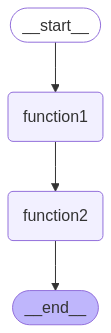

In [8]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [9]:
app1.invoke("hi this is PAVan manikanta ")

'hi this is PAVan manikanta from first function this is function 3 in between and WELL from second function'

In [11]:
input="hi "

for output in app1.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from function1
_______
hi from first function


here is output from function2
_______
hi from first function this is function 3 in between and WELL from second function




#### Now lets create workflow with llm

In [13]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
llm.invoke("hi").content

'Hi there! How can I help you today?'

In [15]:
def function1(input):
    llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
    response=llm.invoke(input).content
    return response
    

In [16]:
def function2(input):
    upper_case=input.upper()
    return upper_case

In [17]:
from langgraph.graph import Graph
workflow2=Graph()

In [18]:
workflow2.add_node("llm",function1)
workflow2.add_node("upper_string",function2)

In [19]:
workflow2.add_edge("llm","upper_string")
workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

In [20]:
app2=workflow2.compile()

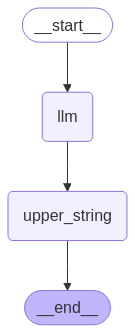

In [24]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [25]:
app2.invoke("what is a name of first indian prime minister?")

'THE FIRST PRIME MINISTER OF INDIA WAS JAWAHARLAL NEHRU.'

In [26]:
input="what is a name of lastest indian prime minister?"

for output in app2.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
The current Prime Minister of India is Narendra Modi.


here is output from upper_string
_______
THE CURRENT PRIME MINISTER OF INDIA IS NARENDRA MODI.




In [27]:
#Here lets create our own output token counter
def function3(input):
    token=input.split()
    token_number=len(token)
    token_number=f"total token number is {token_number}"
    return token_number

In [28]:
workflow3=Graph()
workflow3.add_node("llm",function1)
workflow3.add_node("token_counter",function3)
workflow3.add_edge("llm","token_counter")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")
app3=workflow3.compile()

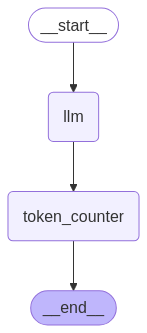

In [29]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [30]:
app3.invoke("what is a name of first indian prime minister?")

'total token number is 9'